In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



In [ ]:
#Subpackage	Description
#cluster	Clustering algorithms
#constants	Physical and mathematical constants
#fftpack	Fast Fourier Transform routines
#integrate	Integration and ordinary differential equation solvers
#interpolate	Interpolation and smoothing splines
#io	Input and Output
#linalg	Linear algebra
#ndimage	N-dimensional image processing
#odr	Orthogonal distance regression
#optimize	Optimization and root-finding routines
#signal	Signal processing
#sparse	Sparse matrices and associated routines
#spatial	Spatial data structures and algorithms
#special	Special functions
#stats	Statistical distributions and functions

In [2]:
a = np.concatenate(([3], [0]*5, np.arange(-1, 1.002, 2/9.0)))
a

array([ 3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.        , -0.77777778, -0.55555556, -0.33333333,
       -0.11111111,  0.11111111,  0.33333333,  0.55555556,  0.77777778,
        1.        ])

In [4]:
np.c_?

NameError: name 'scipy' is not defined

In [16]:
#scipy.optimize.curve_fit
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*x + b
x = np.linspace(0, 10, 100)
y = func(x, 1, 2)
yn = y + 0.9 * np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)
#popt returns the best fit values for parameters of the given model(func)

In [4]:
print(popt)

[0.97261506 2.1547641 ]


In [5]:
print(pcov)
# the diagonal elements are the variances for each parameter

[[ 0.000948   -0.00474   ]
 [-0.00474     0.03175962]]


In [5]:
plt.plot(x, yn, 'b+')
l1, = plt.plot(x, y, 'r')
ye = func(x, popt[0], popt[1])
l2, = plt.plot(x, ye, 'g')
plt.legend(handles=[l1, l2], labels=['Function', 'Best Fit'], loc='best')
plt.show()

NameError: name 'plt' is not defined

In [23]:

def func2(x, a, b, c):
    return a * np.exp(-(x-b)**2/(2*c**2))

x = np.linspace(0, 10, 100)
y = func2(x, 1, 5, 2)

yn = y + 0.2 * np.random.normal(size=len(x))

popt, pcov = curve_fit(func2, x, yn)
print(popt)
print(pcov)

[ 0.96384334  4.94761592 -2.01056795]
[[1.70733223e-03 3.17416014e-06 2.42738483e-03]
 [3.17416014e-06 9.87227421e-03 1.59770874e-05]
 [2.42738483e-03 1.59770874e-05 1.01797144e-02]]


In [6]:
plt.plot(x, y, 'r', label='Function')
plt.plot(x, yn, 'b+')
ye = func2(x, popt[0], popt[1], popt[2])
plt.plot(x, ye, 'g', label='Best Fit')
plt.legend(loc="best")

NameError: name 'plt' is not defined

In [7]:
def func(x, a0, b0, c0, a1, b1, c1):
    return a0*np.exp(-(x-b0)**2/(2*c0**2)) + a1*np.exp(-(x-b1)**2/(2*c1**2))
x = np.linspace(0, 20, 200)
y = func(x, 1, 3, 1, -2, 15, 0.5)
#adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))

# Since we are fitting a more complex function,
# providing guesses for the fitting will lead to
# better results.

guesses = [1, 3, 1, 1, 15, 1]

popt, pcov = curve_fit(func, x, yn, p0=guesses)
print(popt)
print(pcov)

NameError: name 'np' is not defined

In [8]:
plt.plot(x, yn, 'b+')
plt.plot(x, y, 'r', label='Function')
ye = func(x, popt[0], popt[1],popt[2],popt[3],popt[4],popt[5])
plt.plot(x, y, 'g', label='Best Fit')
plt.legend(loc='best')

NameError: name 'plt' is not defined

In [9]:
# the root of a function f(x) = 0
from scipy.optimize import fsolve
line = lambda x: x + 3

#-2 is a estimate for the root
solution = fsolve(line, -2)
print(solution)

[-3.]


In [1]:
#help(fsolve)

In [34]:
from scipy.optimize import fsolve
import numpy as np

def findIntersection(func1, func2, x0):
    return fsolve(lambda x: func1(x) - func2(x), x0)

funky = lambda x : np.cos(x/5) * np.sin(x/2)
line = lambda x : 0.01 * x - 0.5

x = np.linspace(0, 45, 10000)
result = findIntersection(funky, line, [15, 20, 30, 35, 40, 45])

print(result)
print(line(result))
print(funky(result))

[13.40773078 18.11366128 31.78330863 37.0799992  39.84837786 43.8258775 ]
[-0.36592269 -0.31886339 -0.18216691 -0.12920001 -0.10151622 -0.06174122]
[-0.36592269 -0.31886337 -0.18216691 -0.12920001 -0.10151622 -0.06174122]


In [10]:
plt.plot(x, line(x), 'r', label="line")
plt.plot(x, funky(x), 'g', label='funky')
plt.plot(result, line(result), 'bo')
plt.legend(loc='best')

NameError: name 'plt' is not defined

In [2]:
# interpolation
from scipy.interpolate import interp1d
#help(interp1d)

In [11]:
x = np.linspace(0, 10*np.pi, 20)
y = np.cos(x)

fl = interp1d(x, y, kind='linear')
fq = interp1d(x, y, kind='quadratic') 

xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)
yintq = fq(xint)
yreal = np.cos(xint)
plt.plot(xint, yreal, 'r', label="Function")
plt.plot(xint, yintl, 'b', label="Linear")
plt.plot(xint, yintq, 'g', label="quadratic")
plt.plot(x, y, 'bo')
plt.legend(loc='best')

NameError: name 'np' is not defined

In [12]:
#with noise data interpolate
from scipy.interpolate import UnivariateSpline

sample = 30
x = np.linspace(1, 10*np.pi, sample)
y = np.cos(x) + np.log10(x) + np.random.randn(sample)/10

# s is smoothing factor, which should be used when fitting data with noise
f = UnivariateSpline(x, y, s=1)

xint = np.linspace(x.min(), x.max(), 1000)
yint = f(xint)
yreal = np.cos(xint) + np.log10(xint)

plt.plot(xint, yint, label='original')
plt.plot(xint, yreal, label="interpolation")
plt.plot(x, y, 'o')
plt.legend()

NameError: name 'np' is not defined

In [13]:
#mulvaiante example, griddata

from scipy.interpolate import griddata

ripple = lambda x,y: np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2)

grid_x, grid_y = np.mgrid[0:5:1000j, 0:5:1000j]
grid_z = ripple(grid_x, grid_y)
#print(grid_z)
xy = np.random.rand(1000, 2)
sample = ripple(xy[:,0]*5, xy[:,1]*5)

grid_z0 = griddata(xy*5, sample, (grid_x, grid_y), method='cubic')
sp1 = plt.subplot(121)
sp1.scatter(xy[:,0]*1000, xy[:,1]*1000, s=1, c='r')
sp1.imshow(grid_z)
sp1.axis('off')
sp2 = plt.subplot(122)
sp2.imshow(grid_z0) 
sp2.axis('off')

NameError: name 'np' is not defined

In [14]:
#SmoothBivariateSpline multivariate spline interpolation

from scipy.interpolate import SmoothBivariateSpline as SBS

ripple = lambda x,y: np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2)
grid_x, grid_y = np.mgrid[0:5:1000j, 0:5:1000j]
grid_z = ripple(grid_x, grid_y)

xy = np.random.rand(1000, 2)
x = xy[:,0]
y = xy[:,1]
sample = ripple(x*5, y*5)
print(grid_x.shape, grid_y.shape)
print(x.shape, y.shape)

fit = SBS(x*5, y*5, sample, s=0.01, kx=4, ky=4)

interp = fit(np.linspace(0,5,1000), np.linspace(0,5,1000))
print(interp.shape)
sp1 = plt.subplot(121)
sp1.scatter(x*1000, y*1000, s=1, c='r')
sp1.imshow(grid_z)
sp1.axis('off')
sp2 = plt.subplot(122)
sp2.imshow(interp*1000) 

sp2.axis('off')
print(interp)

NameError: name 'np' is not defined

In [79]:
#integration
from scipy.integrate import quad
func = lambda x: np.cos(np.exp(x)) ** 2
solution = quad(func, 0, 3)
print(solution)

(1.296467785724373, 1.397797133112089e-09)


In [15]:
x = np.linspace(0,4,100)
y = func(x)
x0 = x[x < 3]
y1 = func(x0)
#print(x0)
y0 = [0]*len(x0)
plt.plot(x,y)
plt.plot(x0,y0)
plt.stackplot(x0, y1, y0)

NameError: name 'np' is not defined

In [4]:
#help(np.clip)

In [94]:
#trapz is a numerical integrator that utilizes data points

from scipy.integrate import quad, trapz
x = np.sort(np.random.randn(150)*4 + 4).clip(0,5)
func = lambda x: np.sin(x) * np.cos(x**2) + 1
y = func(x)

fsolution = quad(func, 0, 5)
dsolution = trapz(y, x=x)

In [3]:
#help(trapz)

In [97]:
#stats

from scipy.stats import norm
from scipy.stats import geom
x = np.linspace(-5, 5, 1000)

#norm distribution
dist = norm(loc=0, scale=1) # loc is the mean and scale is the standard deviation
#PPF, percent point functions
pdf = dist.pdf(x) # probability density functions
cdf = dist.cdf(x) # cumulative distribution functions
sample = dist.rvs(500) #random variable samples

#geometric distribution
p = 0.5
dist = geom(p)
x = np.linspace(0, 5, 1000)

pmf = dist.pmf(x) #probability mass function
cdf = dist.cdf(x)
sample = dist.rvs(500)


In [98]:
from scipy import stats

sample = np.random.randn(100)
out = stats.normaltest(sample)

print('normaltest output')
print('Z-score = ' + str(out[0]))
print('P-value = ' + str(out[1]))

normaltest output
Z-score = 0.5045868444298025
P-value = 0.7770167106521725


In [99]:
# kstest is the Kolmogorov-Smirnov test for goodness of fit.
# Here its sample is being tested against the normal distribution.
# D is the KS statistic and the closer it is to 0 the better.

out = stats.kstest(sample, 'norm')
print('\nkstest output for the Normal distribution')
print('D = ' + str(out[0]))
print('P-value =' + str(out[1]))


kstest output for the Normal distribution
D = 0.04816353961613451
P-value =0.9744928178598288


In [100]:
out = stats.kstest(sample, 'wald')
print('\nkstest output for the Wald distribution')
print('D = ' + str(out[0]))
print('P-value = ' + str(out[1]))


kstest output for the Wald distribution
D = 0.5526272001737877
P-value = 0.0


In [101]:
# Generating a normal distribution sample
# with 100 elements
sample = np.random.randn(100)
# The harmonic mean: Sample values have to
# be greater than 0.
out = stats.hmean(sample[sample > 0])
print('Harmonic mean = ' + str(out))
# The mean, where values below -1 and above 1 are
# removed for the mean calculation
out = stats.tmean(sample, limits=(-1, 1))
print('\nTrimmed mean = ' + str(out))

# Calculating the skewness of the sample
out = stats.skew(sample)
print('\nSkewness = ' + str(out))
# Additionally, there is a handy summary function called
# describe, which gives a quick look at the data.
out = stats.describe(sample)
print('\nSize = ' + str(out[0]))
print('Min = ' + str(out[1][0]))
print('Max = ' + str(out[1][1]))
print('Mean = ' + str(out[2]))
print('Variance = ' + str(out[3]))
print('Skewness = ' + str(out[4]))
print('Kurtosis = ' + str(out[5]))

Harmonic mean = 0.14833186538928048

Trimmed mean = -0.09521034533859499

Skewness = 0.142211880403775

Size = 100
Min = -3.0097629742774954
Max = 2.702693736944139
Mean = -0.06841685293336387
Variance = 0.8877071111451245
Skewness = 0.142211880403775
Kurtosis = 0.5099426878247986


In [14]:
#fft
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt

In [20]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 2.0])
y = fft(x)
y

array([ 6.5 +0.j       ,  2.75+0.4330127j, -3.25-0.4330127j,
        0.5 +0.j       , -3.25+0.4330127j,  2.75-0.4330127j])

In [5]:
ix = ifft(y)
ix

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

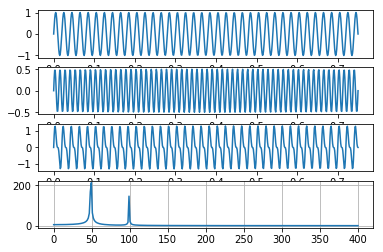

In [27]:

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)

y1 = np.sin(50.0 * 2.0*np.pi*x)
y2 = 0.5*np.sin(80.0 * 2.0*np.pi*x)

y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(100.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.subplot(4,1,1)
plt.plot(x, y1)
plt.subplot(4,1,2)
plt.plot(x, y2)
plt.subplot(4,1,3)
plt.plot(x, y)

plt.subplot(4,1,4)
plt.plot(xf,  np.abs(yf[1:N//2+1]))
plt.grid()
plt.show()

In [16]:
print(y)

[ 0.          0.68279909  1.19014529  1.40086834  1.28340406  0.90024449
  0.38099952 -0.12503486 -0.49880186 -0.68573542 -0.70287975 -0.61829882
 -0.51296156 -0.44174939 -0.4099303  -0.37459598 -0.26996058 -0.04533461
  0.30093358  0.70697275  1.060151    1.23387495  1.13519149  0.74491726
  0.13405722 -0.55127177 -1.13249355 -1.45440369 -1.43456515 -1.08874683
 -0.52353336  0.10082204  0.62351169  0.9330127   0.99622711  0.85779344
  0.61194665  0.35955603  0.16804521  0.04992771 -0.0324274  -0.13915224
 -0.31514228 -0.55914486 -0.81379768 -0.98211981 -0.96494078 -0.70474373
 -0.21803673  0.39790334  0.98858658  1.38921667  1.47873951  1.2215575
  0.6815071   0.00263811 -0.63659546 -1.07949058 -1.23779866 -1.11301288
 -0.78598034 -0.38040754 -0.01525     0.23555995  0.36130325  0.40514442
  0.4330127   0.49503558  0.5965463   0.69142747  0.70109419  0.55156488
  0.21317816 -0.27420558 -0.80245267 -1.22458518 -1.40289913 -1.25844832
 -0.80326603 -0.14254618  0.55513181  1.10967673  1.

In [19]:
print(yf)

[  2.98787181+0.00000000e+00j   3.07932832-4.30954781e-01j
   3.3839872 -9.27991066e-01j   4.02204509-1.59878313e+00j
   5.36033789-2.70663672e+00j   8.91900758-5.27936618e+00j
  35.70392904-2.33116415e+01j -15.59876902+1.05691842e+01j
  -6.01887728+3.81962735e+00j  -3.30261142+1.13351438e+00j
   4.73152773-2.08619993e+01j  -3.20357272+4.65440626e+00j
  -2.37251232+2.96230814e+00j  -1.97463685+2.30872809e+00j
  -1.72126467+1.92757204e+00j  -1.54256643+1.66655221e+00j
  -1.4093749 +1.47187610e+00j  -1.30643969+1.31873235e+00j
  -1.22476634+1.19374758e+00j  -1.15863297+1.08893914e+00j
  -1.10420226+9.99186258e-01j  -1.05879704+9.21023067e-01j
  -1.02049072+8.52004100e-01j  -0.98786139+7.90345452e-01j
  -0.95983739+7.34709742e-01j  -0.93559637+6.84071100e-01j
  -0.9144976 +6.37627082e-01j  -0.89603501+5.94739297e-01j
  -0.87980421+5.54892274e-01j  -0.86547863+5.17664272e-01j
  -0.8527921 +4.82706126e-01j  -0.84152586+4.49725639e-01j
  -0.83149881+4.18475856e-01j  -0.82256003+3.88746146e-0